In [7]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
from matplotlib import pyplot as plt

!pip install mat4py

In [2]:
matlab_train_data = 'trainCharBound.mat'
matlab_test_data = 'testCharBound.mat'

train_data = loadmat(matlab_train_data)
test_data = loadmat(matlab_test_data)

In [3]:
len1 = len(train_data['trainCharBound'][0])
len2 = len(test_data['testCharBound'][0])

print(f'Training Data length:\t{len1}')
print(f'Test Data length:\t{len2}')

Training Data length:	2000
Test Data length:	3000


In [4]:
train_img_names = list()
train_img_lbls = list()
train_img_bb = list()

test_img_names = list()
test_img_lbls = list()
test_img_bb = list()

for i in range(len1):
    train_img_names.append(train_data['trainCharBound'][0][i][0][0])
    train_img_lbls.append(train_data['trainCharBound'][0][i][1][0])
    temp = list()
    for j in range(len(train_data['trainCharBound'][0][i][1][0])):
        temp.append(train_data['trainCharBound'][0][i][2][j])
    train_img_bb.append(temp)
    
for i in range(len2):
    test_img_names.append(test_data['testCharBound'][0][i][0][0])
    test_img_lbls.append(test_data['testCharBound'][0][i][1][0])
    temp = list()
    for j in range(len(test_data['testCharBound'][0][i][1][0])):
        temp.append(test_data['testCharBound'][0][i][2][j])
    test_img_bb.append(temp)

Pickle Stuff

In [5]:
from PIL import Image, ImageOps
import os
import pickle

In [19]:
def processImages(src):
    holder = list()
    
    for img in src:
        image = Image.open(img)
        image = ImageOps.grayscale(image)
        image = np.asarray(image, dtype = np.half)
        holder.append(image)
    return holder

In [20]:
if 'test_imgs' in locals():
    del test_imgs
    
test_imgs = processImages(test_img_names)
train_imgs = processImages(train_img_names)
    
print(f'{len(test_imgs)}\n{len(train_imgs)}')

3000
2000


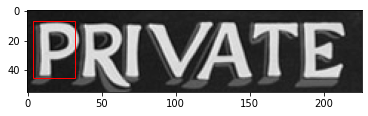

In [30]:
src = test_img_names[0]
image = Image.open(src)
image = ImageOps.grayscale(image)

plt.imshow(image, cmap = 'gray')
rect = plt.Rectangle((4, 7), 28, 38, fc='none', ec="red")
plt.gca().add_patch(rect)
plt.show()

# image2 = Image.open(src)
# image2 = ImageOps.grayscale(image2)
# image2 = image2.resize((100, 32))
# rect2 = plt.Rectangle((), new_w, new_h, fc = 'none', ec = 'blue')
# plt.gca().add_patch(rect2)
# plt.show()

old: (226, 55)
new: (100, 32)
(0.4424778761061947, 0.5818181818181818)


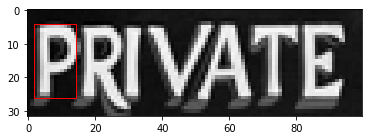

In [38]:
image2 = Image.open(src)
og_width, og_height = image2.size
image2 = ImageOps.grayscale(image2)
image2 = image2.resize((100, 32))
new_width, new_height = image2.size

print(f'old: {(og_width, og_height)}\nnew: {new_width, new_height}')
ratio_width = new_width / og_width
ratio_height = new_height / og_height
print(f'{(ratio_width, ratio_height)}')
x = 4 * ratio_width
y = 7 * ratio_height
width = 28 * ratio_width
height = 38 * ratio_height
rect2 = plt.Rectangle((x, y), width, height, fc='none', ec='red')

plt.imshow(image2, cmap='gray')
plt.gca().add_patch(rect2)
plt.show()

In [47]:
test_img_bb[0][0]

array([ 4.,  7., 32., 45.], dtype=float32)

In [74]:
def rescaleBoundingBox(src, index, bb_src):
    original = src[index]
    og_image = Image.open(original)
    new_image = og_image.resize((100, 32))
    og_width, og_height = og_image.size
    new_width, new_height = new_image.size
    ratio_width = new_width / og_width
    ratio_height = new_height / og_height
    
    result = list()
    
    for i in range(len(bb_src[index])):
        og_x = bb_src[index][i][0]
        og_y = bb_src[index][i][1]
        og_width = bb_src[index][i][2] - og_x
        og_height = bb_src[index][i][3] - og_y
    
        new_x = og_x * ratio_width
        new_y = og_y * ratio_height
        new_width = bb_src[index][i][2] * ratio_width
        new_height = bb_src[index][i][3] * ratio_height
        temp = np.array([new_x, new_y, new_width, new_height], dtype = np.float32)
        result.append(temp)
    return result

In [76]:
original = test_img_bb[0]
resized = rescaleBoundingBox(test_img_names, 0, test_img_bb)

new_test_bb = list()
new_train_bb = list()

for i, _ in enumerate(test_img_names):
    new_test_bb.append(rescaleBoundingBox(test_img_names, i, test_img_bb))

for i, _ in enumerate(train_img_names):
    new_train_bb.append(rescaleBoundingBox(train_img_names, i, train_img_bb))

print(f'{len(new_train_bb)}\n{len(new_test_bb)}')

2000
3000


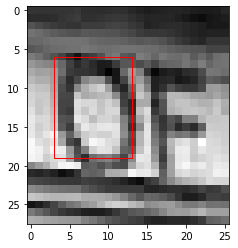

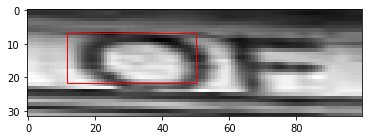

In [49]:
temp = test_img_names[8]
image = Image.open(temp)
image = ImageOps.grayscale(image)

og_width, og_height = image.size

og_x = test_img_bb[8][0][0]
og_y = test_img_bb[8][0][1]
width = test_img_bb[8][0][2] - og_x
height = test_img_bb[8][0][3] - og_y

rect = plt.Rectangle((og_x, og_y), width, height, fc = 'none', ec = 'red')

plt.imshow(image, cmap = 'gray')
plt.gca().add_patch(rect)
plt.show()


image2 = image.resize((100, 32))
new_width, new_height = image2.size
ratio_width = new_width / og_width
ratio_height = new_height / og_height
new_x = og_x * ratio_width
new_y = og_y * ratio_height
new_width = width * ratio_width
new_height = height * ratio_height

rect2 = plt.Rectangle((new_x, new_y), new_width, new_height, fc = 'none', ec = 'red')

plt.imshow(image2, cmap = 'gray')
plt.gca().add_patch(rect2)
plt.show()


In [82]:
def createImageList(isTest = True):
    dir_name =  'test/' if isTest is True else  'train/'
    _, _, image_names = next(os.walk(top = dir_name))
    images = list()
    
    for name in image_names:
        image = Image.open(dir_name + name)
        image = ImageOps.grayscale(image)
        image = image.resize((100, 32))
        image = np.asarray(image, dtype = np.half)
        image /= 255
        images.append(image)
    return images

In [83]:
train_images = createImageList(False)
test_images = createImageList(True)

In [85]:
num_train_samples = len(train_img_names)
num_test_samples = len(test_img_names)

for i in range(10):
    train_image_shard = train_images[(i * num_train_samples) // 10 : ((i + 1) * num_train_samples) // 10]
    train_label_shard = train_img_lbls[(i * num_train_samples) // 10 : ((i + 1) * num_train_samples) // 10]
    train_bb_shard = new_train_bb[(i * num_train_samples) // 10 : ((i + 1) * num_train_samples) // 10]
    with open(f'train_shard_{i}.pkl', 'wb') as f:
        pickle.dump((train_image_shard, train_label_shard, train_bb_shard), f)
        
for i in range(10):
    test_image_shard = test_images[(i * num_test_samples) // 10 : ((i + 1) * num_test_samples) // 10]
    test_label_shard = test_img_lbls[(i * num_test_samples) // 10 : ((i + 1) * num_test_samples) // 10]
    test_bb_shard = new_train_bb[(i * num_test_samples) // 10 : ((i + 1) * num_test_samples) // 10]
    with open(f'test_shard_{i}.pkl', 'wb') as f:
        pickle.dump((test_image_shard, test_label_shard, test_bb_shard), f)

In [ ]:
# Shard the dataset
images, labels = images[:-2], labels[:-2]
num_samples = len(images)
print(num_samples)
for i in range(10):
    image_shard = images[(i * num_samples) // 10 : ((i + 1) * num_samples) // 10]
    label_shard = labels[(i * num_samples) // 10 : ((i + 1) * num_samples) // 10]
    with open(f'shard_{i}.pkl', 'wb') as f:
        pickle.dump((image_shard, label_shard), f)